I'm exploring some of the statistical connection between the different stats. A lot of these tools are shown here:

https://github.com/mycarta/predict/blob/master/Geoscience_ML_notebook_2.ipynb

Okay, let's set up a workspace:

In [45]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import math

import seaborn as sns

%matplotlib inline

In [4]:
def loadstats(position):
    
    #ripped from ginks40's Forecast_Evaluator.ipynb
    
    #position will be a string defining which positional stats we want to bring in, skater or goalie
    
    filename = 'NHL_%s_stats_2011-2016.csv' % position
    results = np.array(pd.read_csv(filename,header=None))
    
    return results

#let's try it out for skaters
stats = loadstats('skater')

#again, very large amount of players so let's just check the size of the import and the first few lines

print (stats.shape)
print (stats[:4,:])

(4412, 24)
[['\ufeffSeason' 'Assists' 'FaceoffWinPctg' 'GameWinningGoals'
  'GamesPlayed' 'Goals' 'OTGoals' 'PenaltyMinutes' 'PlayerFirstName'
  'PlayerId' 'PlayerLastName' 'PlayerName' 'PlayerPositionCode' 'PlusMinus'
  'Points' 'PPGoals' 'PPPoints' 'SHGoals' 'SHPoints' 'ShiftsPerGame'
  'ShootingPctg' 'Shots' 'TeamAbbrev' 'TimeOnIcePerGame']
 ['20112012' '19' '0.00' '0' '80' '5' '0' '66' 'Luca' '8474579' 'Sbisa'
  'Luca Sbisa' 'D' '-5' '24' '0' '3' '0' '0' '21.50' '0.0568' '88' nan
  '1075.7625']
 ['20112012' '0' '1.00' '0' '23' '1' '0' '37' 'Aaron' '8475619' 'Volpatti'
  'Aaron Volpatti' 'L' '-2' '1' '0' '0' '0' '0' '13.6086' '0.0588' '17' nan
  '538.1304']
 ['20112012' '31' '0.4375' '4' '92' '43' '2' '34' 'Alex' '8471214'
  'Ovechkin' 'Alex Ovechkin' 'L' '-10' '74' '15' '27' '0' '0' '21.4782'
  '0.1218' '353' nan '1188.4891']]


But maybe we want as a Pandas table instead of a Numpy array? Are they different???

In [66]:
statspd=pd.read_csv('NHL_skater_stats_2011-2016.csv')#,header=None)

print(statspd.columns)
print(statspd.head(3))

Index(['﻿Season', 'Assists', 'FaceoffWinPctg', 'GameWinningGoals',
       'GamesPlayed', 'Goals', 'OTGoals', 'PenaltyMinutes', 'PlayerFirstName',
       'PlayerId', 'PlayerLastName', 'PlayerName', 'PlayerPositionCode',
       'PlusMinus', 'Points', 'PPGoals', 'PPPoints', 'SHGoals', 'SHPoints',
       'ShiftsPerGame', 'ShootingPctg', 'Shots', 'TeamAbbrev',
       'TimeOnIcePerGame'],
      dtype='object')
    ﻿Season  Assists  FaceoffWinPctg  GameWinningGoals  GamesPlayed  Goals  \
0  20112012       19          0.0000                 0           80      5   
1  20112012        0          1.0000                 0           23      1   
2  20112012       31          0.4375                 4           92     43   

   OTGoals  PenaltyMinutes PlayerFirstName  PlayerId        ...        Points  \
0        0              66            Luca   8474579        ...            24   
1        0              37           Aaron   8475619        ...             1   
2        2              34          

I'd say they print differently, but they both load. Let's try Pandas.

Let's create a new version that drops a few columns... say goodbye to TeamAbbrev, SHPoints, SHGoals, etc.

In [38]:
statscrop=pd.read_csv('NHL_skater_stats_2011-2016.csv')#,header=None)
statscrop.drop(['﻿Season', 'FaceoffWinPctg','GamesPlayed','OTGoals','PPGoals','ShiftsPerGame', 'GameWinningGoals','PenaltyMinutes', 'PlayerFirstName',
       'PlayerLastName', 'PlayerName', 'PlayerPositionCode', 'SHGoals', 'SHPoints', 'TeamAbbrev','PlusMinus'], axis=1, inplace=True)

print (statscrop.columns)

Index(['Assists', 'Goals', 'PlayerId', 'Points', 'PPPoints', 'ShootingPctg',
       'Shots', 'TimeOnIcePerGame'],
      dtype='object')


Notice the weird character before the "S" in "Season"? Let's take care of that...

In [75]:
statspd.rename(columns={'﻿Season': 'Season'}, inplace=True)
print(statspd.columns)

Index(['Season', 'Assists', 'FaceoffWinPctg', 'GameWinningGoals',
       'GamesPlayed', 'Goals', 'OTGoals', 'PenaltyMinutes', 'PlayerFirstName',
       'PlayerId', 'PlayerLastName', 'PlayerName', 'PlayerPositionCode',
       'PlusMinus', 'Points', 'PPGoals', 'PPPoints', 'SHGoals', 'SHPoints',
       'ShiftsPerGame', 'ShootingPctg', 'Shots', 'TeamAbbrev',
       'TimeOnIcePerGame'],
      dtype='object')


Success!

There is a quick tool to illustrate the connections between variables.

<function matplotlib.pyplot.show>

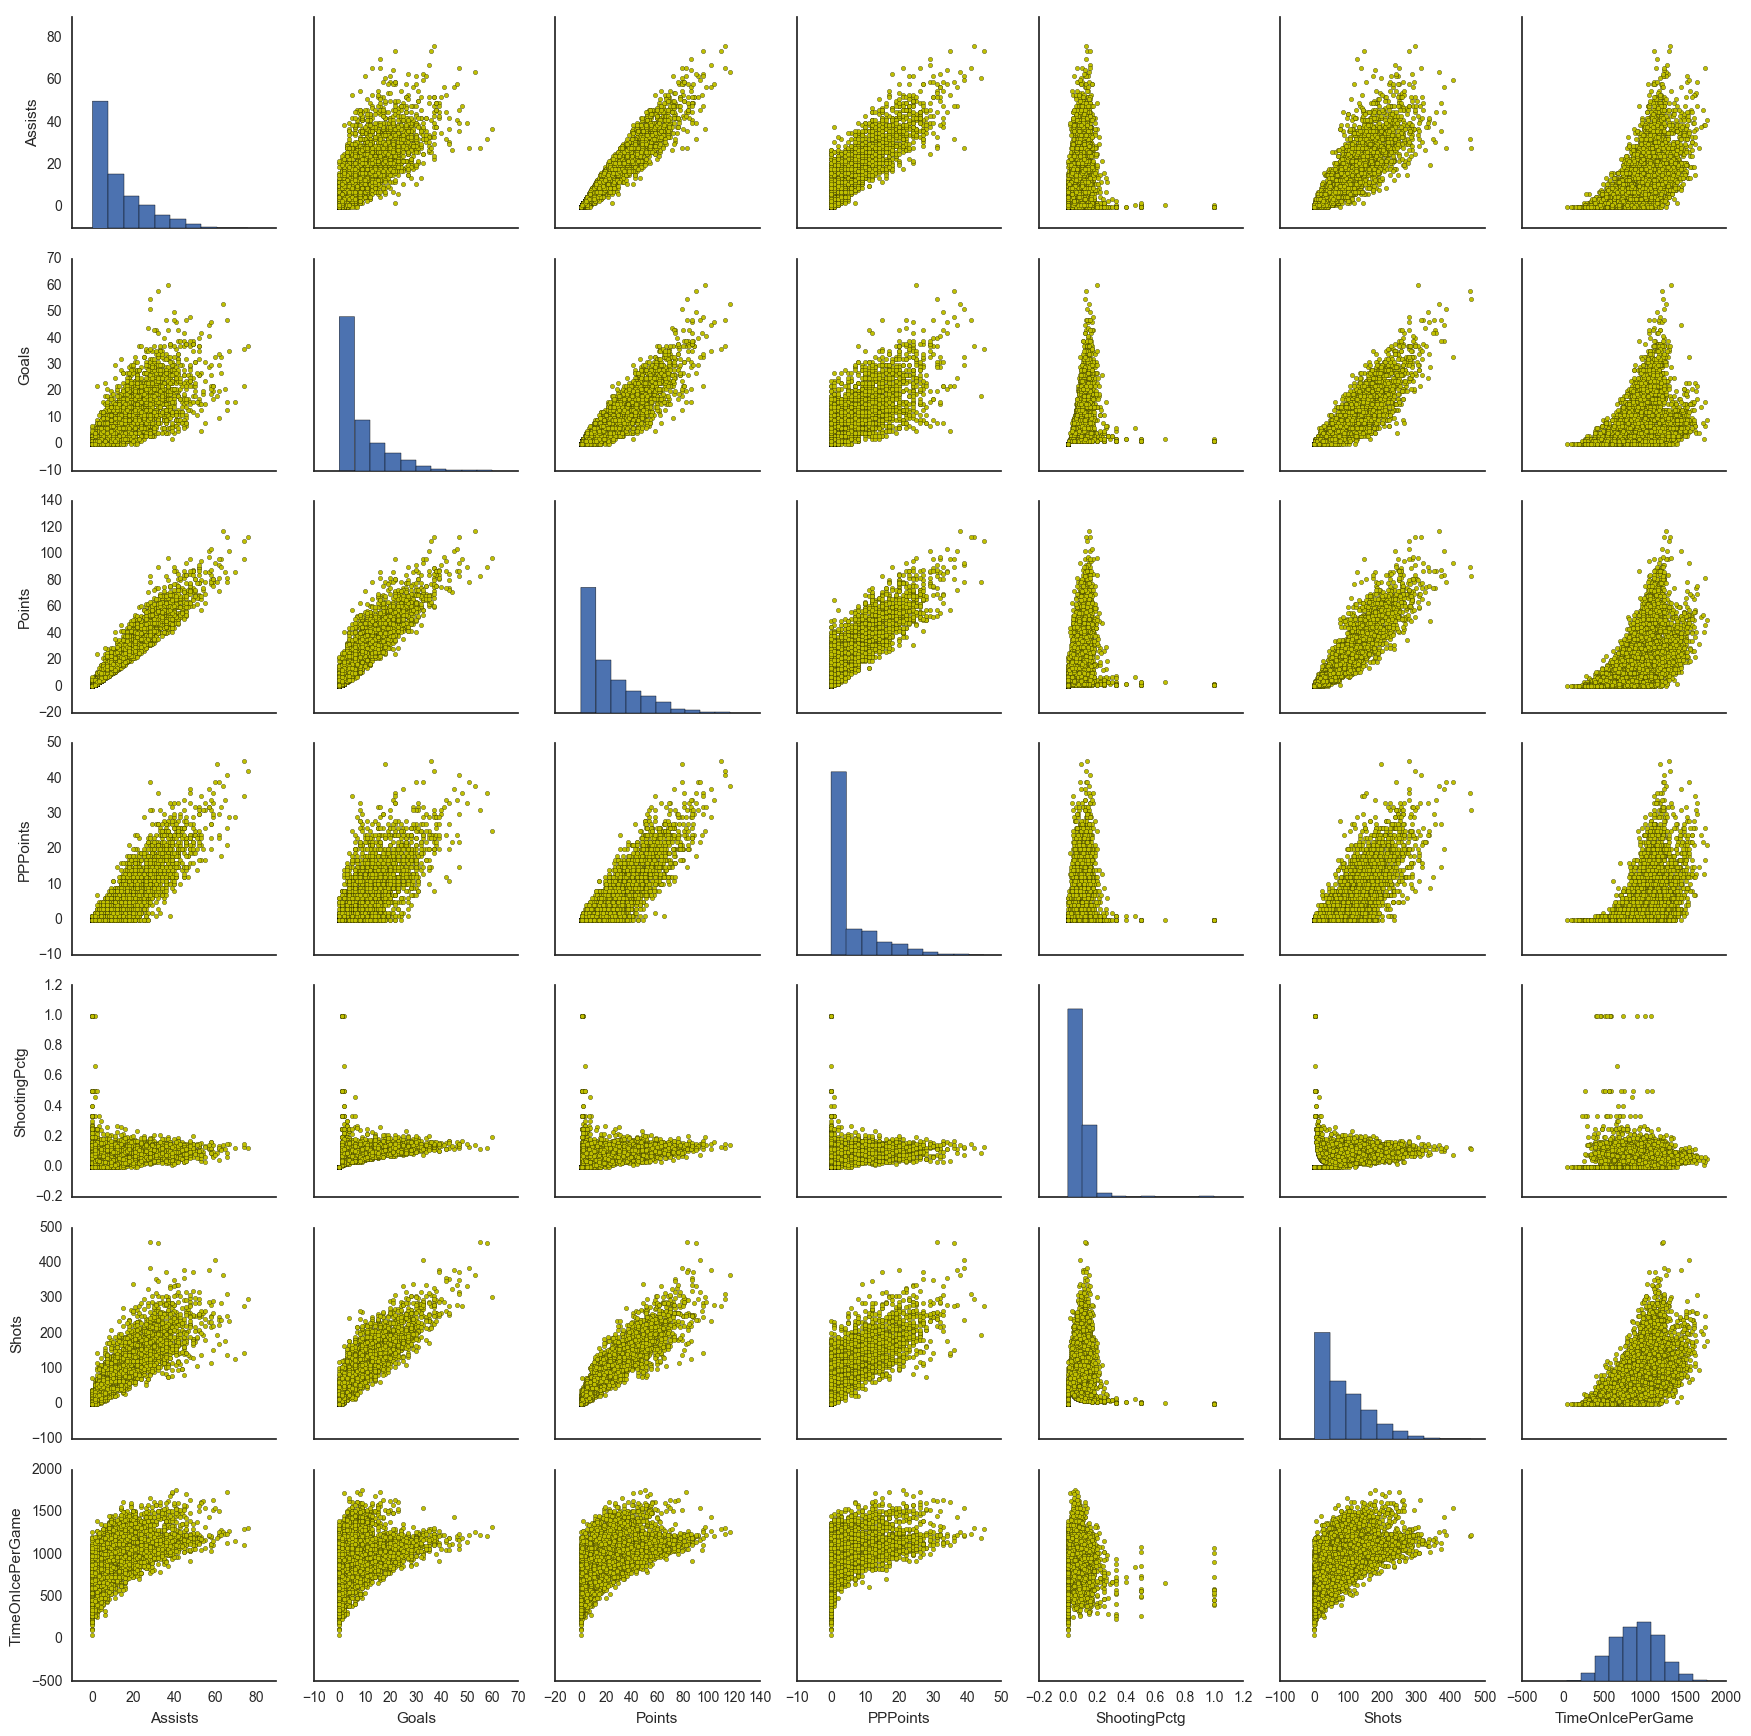

In [61]:
g = sns.PairGrid(statscrop.drop(['PlayerId'],axis=1)) # .drop ignores the columns specified
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, s=10, color = "y", edgecolor="k", linewidth= 0.2)
plt.show


We can also see the correlation coefficients here... less visual, but still of interest.

In [62]:
statscrop.drop(['PlayerId'],axis=1).corr()

,Assists,Goals,Points,PPPoints,ShootingPctg,Shots,TimeOnIcePerGame
Assists,1.000000,0.780075,0.963610,0.876117,0.224032,0.861161,0.644048
Goals,0.780075,1.000000,0.918941,0.771731,0.390481,0.888018,0.422195
Points,0.963610,0.918941,1.000000,0.881957,0.308041,0.922211,0.586343
PPPoints,0.876117,0.771731,0.881957,1.000000,0.228263,0.788138,0.568306
ShootingPctg,0.224032,0.390481,0.308041,0.228263,1.000000,0.233271,0.072093
Shots,0.861161,0.888018,0.922211,0.788138,0.233271,1.000000,0.589294
TimeOnIcePerGame,0.644048,0.422195,0.586343,0.568306,0.072093,0.589294,1.000000


Let's turn this array into a different visual experience...

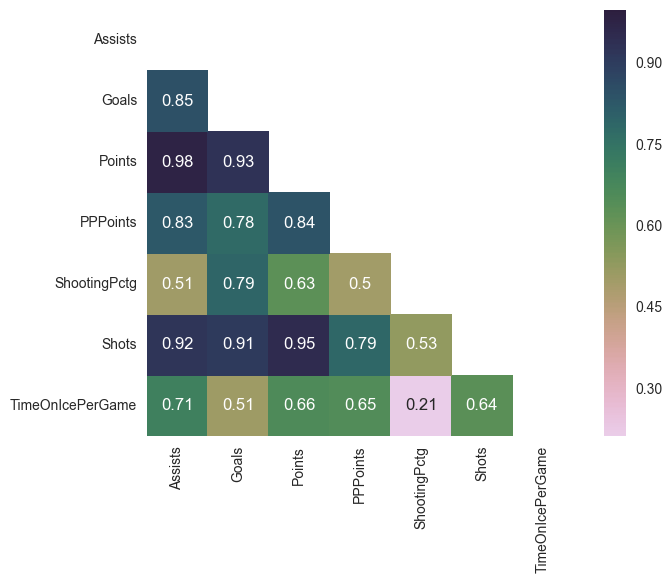

In [60]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(statscrop.drop(['PlayerId'],axis=1).corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(statscrop.drop(['PlayerId'],axis=1).corr(method = 'spearman') ,annot=True,  mask=mask, cmap=cmap, vmax=1, square=True)

plt.show()



One thing we'll have to account for is that the stats we're looking at are likely highly autocorrelated, ie last year's results are related to this year's. How to manage this???

The data is in the data load... for example, here's Ovechkin's stats: (Ovi was one of the few players shown above)

In [69]:
statscrop.loc[statscrop['PlayerId'] == 8471214]

,Assists,Goals,PlayerId,Points,PPPoints,ShootingPctg,Shots,TimeOnIcePerGame
2,31,43,8471214,74,27,0.1218,353,1188.4891
1235,25,33,8471214,58,29,0.1320,250,1251.9454
2495,28,51,8471214,79,39,0.1321,386,1232.7179
3144,32,58,8471214,90,36,0.1271,456,1216.2526
4126,28,55,8471214,83,31,0.1195,460,1226.5384


I guess we want to append all of a player's stats to their row.

I'll create separate dataframes for each season, then merge them together using PlayerId.

In [87]:
statall = pd.read_csv('NHL_skater_stats_2011-2016.csv')#,header=None)
statall.rename(columns={'﻿Season': 'Season'}, inplace=True)
statall.drop(['FaceoffWinPctg','GamesPlayed','OTGoals','PPGoals','ShiftsPerGame', 'GameWinningGoals','PenaltyMinutes', 'PlayerFirstName',
       'PlayerLastName', 'PlayerName', 'PlayerPositionCode', 'SHGoals', 'SHPoints', 'TeamAbbrev','PlusMinus'], axis=1, inplace=True)

print("(rows, columns) =",statall.shape)

statall.head(4)

(rows, columns) = (4411, 9)


,Season,Assists,Goals,PlayerId,Points,PPPoints,ShootingPctg,Shots,TimeOnIcePerGame
0,20112012,19,5,8474579,24,3,0.0568,88,1075.7625
1,20112012,0,1,8475619,1,0,0.0588,17,538.1304
2,20112012,31,43,8471214,74,27,0.1218,353,1188.4891
3,20112012,18,7,8459457,25,0,0.0518,135,842.2658


In [139]:
stat2011 = pd.DataFrame(statall.loc[statall['Season'] == 20112012].drop('Season',axis=1))

print("(rows, columns) =",stat2011.shape)

(rows, columns) = (897, 8)


Okay, we have 897 records for 2011-2012. Let's rename the columns of this dataframe to note the year, then set the PlayerId as the index for the dataframe.

In [141]:
stat2011.rename(columns={'Assists': 'Assists2011', 'Goals':'Goals2011','Points':'Points2011','PPPoints':'PPPoints2011','ShootingPctg':'ShootingPctg2011','Shots':'Shots2011','TimeOnIcePerGame':'TimeOnIcePerGame2011'}, inplace=True)

stat2011.set_index('PlayerId', inplace=True)

stat2011.head(4)

,Assists2011,Goals2011,Points2011,PPPoints2011,ShootingPctg2011,Shots2011,TimeOnIcePerGame2011
PlayerId,,,,,,,
8474579,19,5,24,3,0.0568,88,1075.7625
8475619,0,1,1,0,0.0588,17,538.1304
8471214,31,43,74,27,0.1218,353,1188.4891
8459457,18,7,25,0,0.0518,135,842.2658


Let's do this for the other years....

In [142]:
stat2012 = pd.DataFrame(statall.loc[statall['Season'] == 20122013].drop('Season',axis=1))
stat2013 = pd.DataFrame(statall.loc[statall['Season'] == 20132014].drop('Season',axis=1))
stat2014 = pd.DataFrame(statall.loc[statall['Season'] == 20142015].drop('Season',axis=1))
stat2015 = pd.DataFrame(statall.loc[statall['Season'] == 20152016].drop('Season',axis=1))

stat2012.rename(columns={'Assists': 'Assists2012', 'Goals':'Goals2012','Points':'Points2012','PPPoints':'PPPoints2012','ShootingPctg':'ShootingPctg2012','Shots':'Shots2012','TimeOnIcePerGame':'TimeOnIcePerGame2012'}, inplace=True)
stat2013.rename(columns={'Assists': 'Assists2013', 'Goals':'Goals2013','Points':'Points2013','PPPoints':'PPPoints2013','ShootingPctg':'ShootingPctg2013','Shots':'Shots2013','TimeOnIcePerGame':'TimeOnIcePerGame2013'}, inplace=True)
stat2014.rename(columns={'Assists': 'Assists2014', 'Goals':'Goals2014','Points':'Points2014','PPPoints':'PPPoints2014','ShootingPctg':'ShootingPctg2014','Shots':'Shots2014','TimeOnIcePerGame':'TimeOnIcePerGame2014'}, inplace=True)
stat2015.rename(columns={'Assists': 'Assists2015', 'Goals':'Goals2015','Points':'Points2015','PPPoints':'PPPoints2015','ShootingPctg':'ShootingPctg2015','Shots':'Shots2015','TimeOnIcePerGame':'TimeOnIcePerGame2015'}, inplace=True)

stat2012.set_index('PlayerId', inplace=True)
stat2013.set_index('PlayerId', inplace=True)
stat2014.set_index('PlayerId', inplace=True)
stat2015.set_index('PlayerId', inplace=True)

print("2012 (rows, columns) =",stat2012.shape)
print("2013 (rows, columns) =",stat2013.shape)
print("2014 (rows, columns) =",stat2014.shape)
print("2015 (rows, columns) =",stat2015.shape)

2012 (rows, columns) = (843, 7)
2013 (rows, columns) = (888, 7)
2014 (rows, columns) = (883, 7)
2015 (rows, columns) = (900, 7)


Concatenate these years together...

In [143]:
statmultiyear = pd.concat([stat2011,stat2012,stat2013,stat2014,stat2015],axis=1)

print("multiyear (rows, columns) =",statmultiyear.shape)

multiyear (rows, columns) = (1458, 35)


Cool. This suggests that there have been 1458 players in the NHL in the past 5 years. There are 36 columns though... let's just check to see that they are what we'd expect.

In [144]:
statmultiyear.columns

Index(['Assists2011', 'Goals2011', 'Points2011', 'PPPoints2011',
       'ShootingPctg2011', 'Shots2011', 'TimeOnIcePerGame2011', 'Assists2012',
       'Goals2012', 'Points2012', 'PPPoints2012', 'ShootingPctg2012',
       'Shots2012', 'TimeOnIcePerGame2012', 'Assists2013', 'Goals2013',
       'Points2013', 'PPPoints2013', 'ShootingPctg2013', 'Shots2013',
       'TimeOnIcePerGame2013', 'Assists2014', 'Goals2014', 'Points2014',
       'PPPoints2014', 'ShootingPctg2014', 'Shots2014', 'TimeOnIcePerGame2014',
       'Assists2015', 'Goals2015', 'Points2015', 'PPPoints2015',
       'ShootingPctg2015', 'Shots2015', 'TimeOnIcePerGame2015'],
      dtype='object')

Running correlation anaysis on all of these would be a bit much, right? Besides, we're just interested in seeing how much autocorrelation there is for these variables. Let's look at assists in particular.

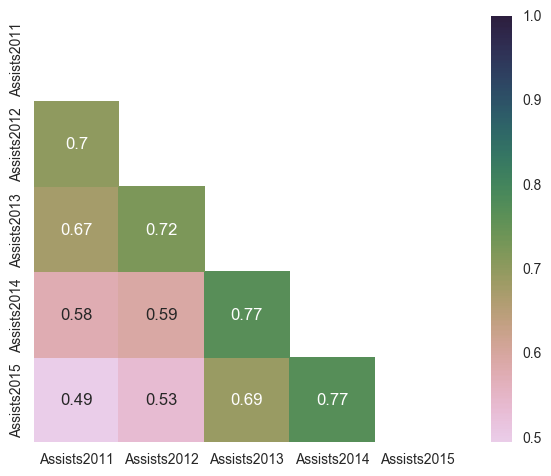

In [147]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(statmultiyear[['Assists2011','Assists2012','Assists2013','Assists2014','Assists2015']].corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(statmultiyear[['Assists2011','Assists2012','Assists2013','Assists2014','Assists2015']].corr(method = 'spearman') ,annot=True,  mask=mask, cmap=cmap, vmax=1, square=True)

plt.show()



In [145]:
statmultiyear[['Assists2011','Assists2012','Assists2013','Assists2014','Assists2015']].corr()

,Assists2011,Assists2012,Assists2013,Assists2014,Assists2015
Assists2011,1.000000,0.722486,0.700016,0.616382,0.542132
Assists2012,0.722486,1.000000,0.746634,0.632887,0.595029
Assists2013,0.700016,0.746634,1.000000,0.777983,0.719289
Assists2014,0.616382,0.632887,0.777983,1.000000,0.796604
Assists2015,0.542132,0.595029,0.719289,0.796604,1.000000


I think the point here is that more recent results are the most correlated. No surprises.